In [5]:
import xarray as xr
import xesmf as xe
import numpy as np
from numpy import s_
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [2]:
file = '/g/data/gy85/Himawari8_AusGeo1-0-3/L1/summer_2015-2016/201511/geocatL1.HIMAWARI-8.2015305.000000.FLDK.R20.nc'

In [22]:
ds = xr.open_dataset(file).isel(elements=s_[::10], lines=s_[::10])

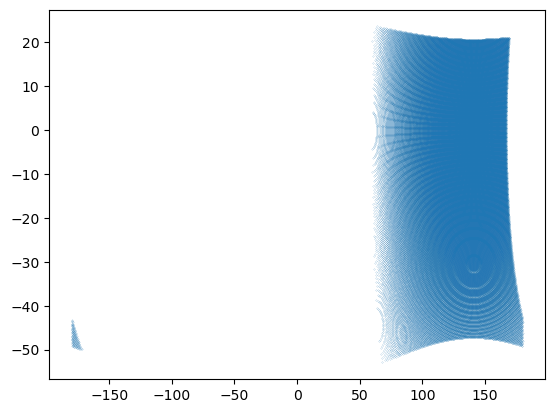

In [23]:
plt.scatter(ds["pixel_longitude"], ds["pixel_latitude"], s=0.01)

In [24]:
ds = ds.rename({
    "pixel_latitude": "lat",
    "pixel_longitude": "lon"
})
ds

<xarray.Dataset>
Dimensions:                                           (lines: 550, elements: 550)
Dimensions without coordinates: lines, elements
Data variables: (12/25)
    himawari_8_ahi_channel_10_brightness_temperature  (lines, elements) float32 ...
    himawari_8_ahi_channel_11_brightness_temperature  (lines, elements) float32 ...
    himawari_8_ahi_channel_12_brightness_temperature  (lines, elements) float32 ...
    himawari_8_ahi_channel_13_brightness_temperature  (lines, elements) float32 ...
    himawari_8_ahi_channel_14_brightness_temperature  (lines, elements) float32 ...
    himawari_8_ahi_channel_15_brightness_temperature  (lines, elements) float32 ...
    ...                                                ...
    lat                                               (lines, elements) float32 ...
    lon                                               (lines, elements) float32 ...
    pixel_relative_azimuth_angle                      (lines, elements) float32 ...
    pixel_satellite_zenith_angle                      (lines, elements) float32 ...
    pixel_solar_zenith_angle                          (lines, elements) float32 ...
    pixel_surface_type                                (lines, elements) float32 ...
Attributes: (12/66)
    Ancillary_Data_Directory:              ./data/
    Ancillary_Package_Version:             NA
    Channel_Number_Convention:             instrument-native
    Earth-Sun_Distance:                    0.9924923181533813
    Element_Resolution:                    2.0
    Element_Stride:                        1
    ...                                    ...
    time_coverage_end:                     2020-03-31
    geospatial_lat_min:                    -51.42
    geospatial_lat_max:                    23.09
    geospatial_lon_min:                    70.16
    geospatial_lon_max:                    188.8
    id:                                    http://dx.doi.org/10.25914/6009622...

In [7]:
dir(xe.util)

['HUGE',
 'LAT_CF_ATTRS',
 'LON_CF_ATTRS',
 'MultiPolygon',
 'PI_180',
 'Polygon',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_bipolar_projection',
 '_default_Re',
 '_flatten_poly_list',
 '_generate_bipolar_cap_mesh',
 '_grid_1d',
 '_mdist',
 'cf_grid_2d',
 'grid_2d',
 'grid_global',
 'np',
 'simple_tripolar_grid',
 'split_polygons_and_holes',
 'warnings',
 'xr']

In [8]:
help(xe.util.grid_2d)

Help on function grid_2d in module xesmf.util:

grid_2d(lon0_b, lon1_b, d_lon, lat0_b, lat1_b, d_lat)
    2D rectilinear grid centers and bounds
    
    Parameters
    ----------
    lon0_b, lon1_b : float
        Longitude bounds
    
    d_lon : float
        Longitude step size, i.e. grid resolution
    
    lat0_b, lat1_b : float
        Latitude bounds
    
    d_lat : float
        Latitude step size, i.e. grid resolution
    
    Returns
    -------
    ds : xarray DataSet with coordinate values



In [25]:
out_grid = xe.util.grid_2d(lat0_b=-22, lat1_b=-12, lon0_b=140, lon1_b=155, d_lat=0.18, d_lon=0.18)

In [26]:
lon = np.arange(140, 155, 0.18)
lon = xr.DataArray(lon, dims=('lon',), coords={'lon': lon}, attrs={'name': 'Longitude', 'units': 'degree_east'})

lat = np.arange(-22, -12, 0.18)
lat = xr.DataArray(lat, dims=('lat',), coords={'lat': lat}, attrs={'name': 'Latitude', 'units': 'degree_north'})

out_grid=xr.Dataset({'lat': lat, 'lon': lon})

In [27]:
%%time
mask = np.ones_like(ds.lat)
mask = xr.DataArray(mask, dims=('lines', 'elements'), coords={'lines': ds.lines, 'elements': ds.elements})

ds = ds.where(mask==1, drop=True)
ds

CPU times: user 1.97 s, sys: 92.5 ms, total: 2.06 s
Wall time: 2.06 s


<xarray.Dataset>
Dimensions:                                           (lines: 550, elements: 550)
Coordinates:
  * lines                                             (lines) int64 0 1 ... 549
  * elements                                          (elements) int64 0 ... 549
Data variables: (12/25)
    himawari_8_ahi_channel_10_brightness_temperature  (lines, elements) float32 ...
    himawari_8_ahi_channel_11_brightness_temperature  (lines, elements) float32 ...
    himawari_8_ahi_channel_12_brightness_temperature  (lines, elements) float32 ...
    himawari_8_ahi_channel_13_brightness_temperature  (lines, elements) float32 ...
    himawari_8_ahi_channel_14_brightness_temperature  (lines, elements) float32 ...
    himawari_8_ahi_channel_15_brightness_temperature  (lines, elements) float32 ...
    ...                                                ...
    lat                                               (lines, elements) float32 ...
    lon                                               (lines, elements) float32 ...
    pixel_relative_azimuth_angle                      (lines, elements) float32 ...
    pixel_satellite_zenith_angle                      (lines, elements) float32 ...
    pixel_solar_zenith_angle                          (lines, elements) float32 ...
    pixel_surface_type                                (lines, elements) float32 ...
Attributes: (12/66)
    Ancillary_Data_Directory:              ./data/
    Ancillary_Package_Version:             NA
    Channel_Number_Convention:             instrument-native
    Earth-Sun_Distance:                    0.9924923181533813
    Element_Resolution:                    2.0
    Element_Stride:                        1
    ...                                    ...
    time_coverage_end:                     2020-03-31
    geospatial_lat_min:                    -51.42
    geospatial_lat_max:                    23.09
    geospatial_lon_min:                    70.16
    geospatial_lon_max:                    188.8
    id:                                    http://dx.doi.org/10.25914/6009622...

In [28]:
%%time
regridder = xe.Regridder(ds, out_grid, 'bilinear')

CPU times: user 2.43 s, sys: 57.6 ms, total: 2.49 s
Wall time: 2.53 s


In [29]:
dr = ds["himawari_8_ahi_channel_13_brightness_temperature"]
dr_out = regridder(dr)

In [30]:
dr_out

<xarray.DataArray (lat: 56, lon: 84)>
array([[307.7881 , 306.92917, 311.60364, ..., 292.16843, 292.95456,
        293.6164 ],
       [305.18356, 304.78052, 307.86115, ..., 292.65543, 293.31787,
        293.79245],
       [304.84827, 303.88898, 306.1113 , ..., 293.45422, 293.75015,
        293.78998],
       ...,
       [295.1545 , 293.32755, 295.25928, ..., 283.46906, 282.41388,
        285.34958],
       [295.40002, 294.64453, 295.88623, ..., 285.17   , 285.55225,
        286.22986],
       [295.9524 , 295.765  , 294.71597, ..., 288.11258, 288.864  ,
        287.54117]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -22.0 -21.82 -21.64 -21.46 ... -12.46 -12.28 -12.1
  * lon      (lon) float64 140.0 140.2 140.4 140.5 ... 154.4 154.6 154.8 154.9
Attributes:
    regrid_method:  bilinear

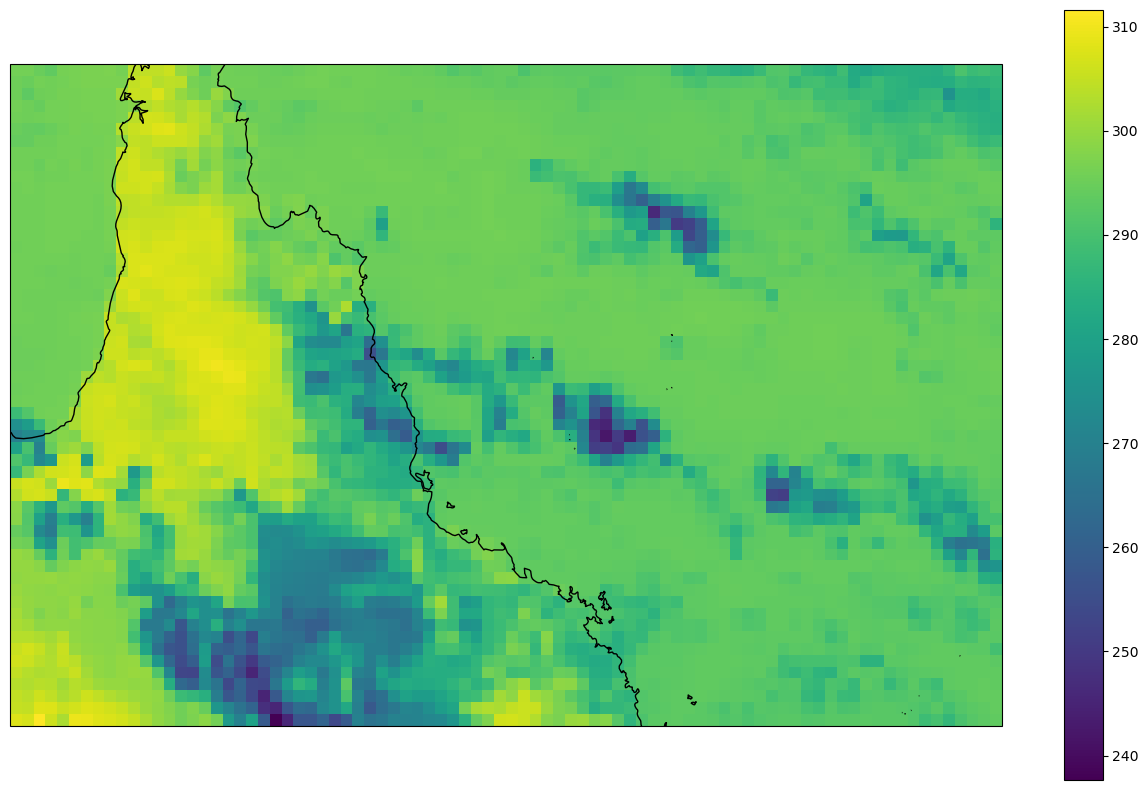

In [31]:
fig, ax = plt.subplots(figsize=(16,10), subplot_kw={"projection": ccrs.PlateCarree()})
dr_out.plot(ax=ax, transform=ccrs.PlateCarree())
ax.coastlines()
plt.show()

In [25]:
dr_out.lat[1]

<xarray.DataArray 'lat' (x: 83)>
array([-21.73, -21.73, -21.73, -21.73, -21.73, -21.73, -21.73, -21.73,
       -21.73, -21.73, -21.73, -21.73, -21.73, -21.73, -21.73, -21.73,
       -21.73, -21.73, -21.73, -21.73, -21.73, -21.73, -21.73, -21.73,
       -21.73, -21.73, -21.73, -21.73, -21.73, -21.73, -21.73, -21.73,
       -21.73, -21.73, -21.73, -21.73, -21.73, -21.73, -21.73, -21.73,
       -21.73, -21.73, -21.73, -21.73, -21.73, -21.73, -21.73, -21.73,
       -21.73, -21.73, -21.73, -21.73, -21.73, -21.73, -21.73, -21.73,
       -21.73, -21.73, -21.73, -21.73, -21.73, -21.73, -21.73, -21.73,
       -21.73, -21.73, -21.73, -21.73, -21.73, -21.73, -21.73, -21.73,
       -21.73, -21.73, -21.73, -21.73, -21.73, -21.73, -21.73, -21.73,
       -21.73, -21.73, -21.73])
Coordinates:
    lat      (x) float64 -21.73 -21.73 -21.73 -21.73 ... -21.73 -21.73 -21.73
    lon      (x) float64 140.1 140.3 140.5 140.6 ... 154.3 154.5 154.7 154.9
Dimensions without coordinates: x
Attributes:
    standard_name:  latitude

In [67]:
mask = np.ndarray((5500, 5500), dtype=bool)

In [75]:
for l, lat in enumerate(ds.lat):
    print(f"{e}, {lat}")
# for e in range(len(ds.elements)):
#     for l in range(len(ds.lines)):
#         lon = ds.lon.isel(elements=e, lines=l).item()
#         lat = ds.lat.isel(elements=e, lines=l).item()
#         if (139<lon<156) and (-23<lat<-11):
#             mask[l, e] = 1
#     print(f"{e} / {len(ds.elements)}")

0, <xarray.DataArray 'lat' (elements: 5500)>
array([nan, nan, nan, ..., nan, nan, nan], dtype=float32)
Dimensions without coordinates: elements
Attributes:
    reference:          none
    algorithm_index:    32
    valid_range:        [-32767  32767]
    algorithm_name:     NA
    long_name:          pixel-resolution array of latitudes
    valid_min:          -32767
    units:              degrees_north
    scaling_method:     1
    valid_max:          32767
    algorithm_version:  NA
    standard_name:      latitude


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [62]:
ds.lat

<xarray.DataArray 'lat' (lines: 5500, elements: 5500)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Dimensions without coordinates: lines, elements
Attributes:
    reference:          none
    algorithm_index:    32
    valid_range:        [-32767  32767]
    algorithm_name:     NA
    long_name:          pixel-resolution array of latitudes
    valid_min:          -32767
    units:              degrees_north
    scaling_method:     1
    valid_max:          32767
    algorithm_version:  NA
    standard_name:      latitude

In [16]:
a = list(range(1000))

In [21]:
a[::5]

[0,
 5,
 10,
 15,
 20,
 25,
 30,
 35,
 40,
 45,
 50,
 55,
 60,
 65,
 70,
 75,
 80,
 85,
 90,
 95,
 100,
 105,
 110,
 115,
 120,
 125,
 130,
 135,
 140,
 145,
 150,
 155,
 160,
 165,
 170,
 175,
 180,
 185,
 190,
 195,
 200,
 205,
 210,
 215,
 220,
 225,
 230,
 235,
 240,
 245,
 250,
 255,
 260,
 265,
 270,
 275,
 280,
 285,
 290,
 295,
 300,
 305,
 310,
 315,
 320,
 325,
 330,
 335,
 340,
 345,
 350,
 355,
 360,
 365,
 370,
 375,
 380,
 385,
 390,
 395,
 400,
 405,
 410,
 415,
 420,
 425,
 430,
 435,
 440,
 445,
 450,
 455,
 460,
 465,
 470,
 475,
 480,
 485,
 490,
 495,
 500,
 505,
 510,
 515,
 520,
 525,
 530,
 535,
 540,
 545,
 550,
 555,
 560,
 565,
 570,
 575,
 580,
 585,
 590,
 595,
 600,
 605,
 610,
 615,
 620,
 625,
 630,
 635,
 640,
 645,
 650,
 655,
 660,
 665,
 670,
 675,
 680,
 685,
 690,
 695,
 700,
 705,
 710,
 715,
 720,
 725,
 730,
 735,
 740,
 745,
 750,
 755,
 760,
 765,
 770,
 775,
 780,
 785,
 790,
 795,
 800,
 805,
 810,
 815,
 820,
 825,
 830,
 835,
 840,
 845,
 8